In [1]:
#文件导入
import numpy as np 
import cv2 
import os 
import matplotlib.pyplot as plt 
import time 
import os.path as osp 
import xml.etree.ElementTree as ET 
from matplotlib.colors import LogNorm

In [18]:
# 读取图片
num_IMG = 1

fore_name =['OriRGB_pitaya_', 'RbRGB_pitaya_']
image_name = fore_name[0]+ str(num_IMG).zfill(6)


rootpath1 ='./VOC2007/JPEGImages/'
image = cv2.imread( os.path.join(rootpath1, image_name +'.jpg'))        
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)     
# plt.rcParams[ 'figure.figsize' ] = [16, 6]                           
# plt.imshow(image) 

# 去除背景的图像
rootpath_Rb = 'JPEGImages_Rb_HLGMulti/'
image_name_Rb = fore_name[1]+ str(num_IMG).zfill(6)
# print('image_name_Rb',image_name_Rb)
# print('path',os.path.join(rootpath1, image_name_Rb +'.jpg'))
image_Rb = cv2.imread( os.path.join(rootpath_Rb, image_name_Rb +'.jpg')) 
# image2 = cv2.cvtColor(image_Rb, cv2.COLOR_BGR2RGB) 
# plt.rcParams[ 'figure.figsize' ] = [16, 6]                           
# plt.imshow(image2) 

# 读取 xml 
# 读取路径下的文件  
rootpath2 = './VOC2007/Annotations/'
xml_filepath = os.path.join(rootpath2, image_name +'.xml')       
print(xml_filepath) 

updateTree = ET.parse(xml_filepath)  # parse xml documents into element tree
root = updateTree.getroot()      # return root element


# dict - bbox - cls 
rectangle_loc={ }
class_name = ["NO", "OWF", "OF", "FCC", "OB"]
for cls in class_name:
   rectangle_loc[cls] = []


for obj in root.iter('object'):
   cls = obj.find('name').text

   if cls == 'NO':
      xmlbox = obj.find('bndbox') 
      b = (int(float(xmlbox.find('xmin').text)), int(float(xmlbox.find('ymin').text)), int(float(xmlbox.find('xmax').text)), int(float(xmlbox.find('ymax').text)))
      rectangle_loc['NO'].append(b)    

   elif cls == 'OWF':
      xmlbox = obj.find('bndbox') 
      b = (int(float(xmlbox.find('xmin').text)), int(float(xmlbox.find('ymin').text)), int(float(xmlbox.find('xmax').text)), int(float(xmlbox.find('ymax').text)))
      rectangle_loc['OWF'].append(b) 

   elif cls == 'OF':
      xmlbox = obj.find('bndbox') 
      b = (int(float(xmlbox.find('xmin').text)), int(float(xmlbox.find('ymin').text)), int(float(xmlbox.find('xmax').text)), int(float(xmlbox.find('ymax').text)))
      rectangle_loc['OF'].append(b)

   elif cls == 'FCC':
      xmlbox = obj.find('bndbox') 
      b = (int(float(xmlbox.find('xmin').text)), int(float(xmlbox.find('ymin').text)), int(float(xmlbox.find('xmax').text)), int(float(xmlbox.find('ymax').text)))
      rectangle_loc['FCC'].append(b) 

   elif cls == 'OB':
      xmlbox = obj.find('bndbox') 
      b = (int(float(xmlbox.find('xmin').text)), int(float(xmlbox.find('ymin').text)), int(float(xmlbox.find('xmax').text)), int(float(xmlbox.find('ymax').text)))
      rectangle_loc['OB'].append(b) 
   
   else:
      print( 'no target' ) 

print(rectangle_loc)

./VOC2007/Annotations/OriRGB_pitaya_000001.xml
{'NO': [], 'OWF': [], 'OF': [(274, 830, 404, 925), (403, 847, 480, 959)], 'FCC': [(480, 830, 585, 946)], 'OB': []}


In [20]:
# opencv读取图片的默认像素排列是BGR = RGB
# color_dict
class_name = ["NO", "OWF", "OF", "FCC", "OB"]
color_custom = [(255,0,0), (0,128,0), (0,0,255), (255,165,0), (128,0,128)]           # red = (255,0,0) | green=(0,128,0) | blue = (0,0,255) | Orange = (255,165,0) | Purple= (128,0,128)
color_cls_dict ={ }

for cls, col in zip(class_name, color_custom):
    # RGB ==> BGR
    col_BGR = [] # 清空
    col_RGB = list(col)
    col_BGR = [col_RGB[2], col_RGB[1] , col_RGB[0]]
    color_cls_dict[cls] = col_BGR
print(color_cls_dict)


# 绘制方框
for key_cls, value_rectangle in rectangle_loc.items():
    print(key_cls, value_rectangle) 
   
    for i_num in range(len(value_rectangle)):
        xmin, ymin, xmax, ymax = value_rectangle[i_num]
        print('xmin, ymin, xmax, ymax == ', xmin, ymin, xmax, ymax )

        IMG_rec = cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color_cls_dict[key_cls], 3)      # 画框,没有数据，
        IMG_rec_Rb = cv2.rectangle(image_Rb, (xmin, ymin), (xmax, ymax), color_cls_dict[key_cls], 3)
        
         
floder_list = ['rectangle_box','rectangle_box_Rb']
for floder in floder_list:
    if not os.path.isdir(floder):
        os.makedirs(floder)

cv2.imwrite(floder_list[0] + '/'+ image_name + '_rectanglebox_img.jpg', IMG_rec)  
cv2.imwrite(floder_list[1] + '/' + image_name_Rb + '_rectanglebox_img.jpg', IMG_rec_Rb)  
    


{'NO': [0, 0, 255], 'OWF': [0, 128, 0], 'OF': [255, 0, 0], 'FCC': [0, 165, 255], 'OB': [128, 0, 128]}
NO []
OWF []
OF [(274, 830, 404, 925), (403, 847, 480, 959)]
xmin, ymin, xmax, ymax ==  274 830 404 925
xmin, ymin, xmax, ymax ==  403 847 480 959
FCC [(480, 830, 585, 946)]
xmin, ymin, xmax, ymax ==  480 830 585 946
OB []


True

In [31]:
## == 批量处理 ==##
# 读取图片
def Get_rectangle_loc(num_IMG = 1):
    fore_name =['OriRGB_pitaya_', 'RbRGB_pitaya_']
    image_name = fore_name[0]+ str(num_IMG).zfill(6)

    rootpath1 ='./VOC2007/JPEGImages/'
    image = cv2.imread( os.path.join(rootpath1, image_name +'.jpg'))        
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)     
    # plt.rcParams[ 'figure.figsize' ] = [16, 6]                           
    # plt.imshow(image) 
    
    # 去除背景的图像
    rootpath_Rb = 'JPEGImages_Rb_HLGMulti/'
    image_name_Rb = fore_name[1]+ str(num_IMG).zfill(6)
    # print('image_name_Rb',image_name_Rb)
    # print('path',os.path.join(rootpath1, image_name_Rb +'.jpg'))
    image_Rb = cv2.imread( os.path.join(rootpath_Rb, image_name_Rb +'.jpg')) 
    # image2 = cv2.cvtColor(image_Rb, cv2.COLOR_BGR2RGB) 
    # plt.rcParams[ 'figure.figsize' ] = [16, 6]                           
    # plt.imshow(image2)    

    # 读取 xml 
    # 读取路径下的文件  
    rootpath2 = './VOC2007/Annotations/'
    xml_filepath = os.path.join(rootpath2, image_name +'.xml')       
    print(xml_filepath) 

    updateTree = ET.parse(xml_filepath)  # parse xml documents into element tree
    root = updateTree.getroot()      # return root element


    # dict - bbox - cls 
    rectangle_loc={ }
    class_name = ["NO", "OWF", "OF", "FCC", "OB"]
    for cls in class_name:
        rectangle_loc[cls] = []


    for obj in root.iter('object'):
        cls = obj.find('name').text

        if cls == 'NO':
            xmlbox = obj.find('bndbox') 
            b = (int(float(xmlbox.find('xmin').text)), int(float(xmlbox.find('ymin').text)), int(float(xmlbox.find('xmax').text)), int(float(xmlbox.find('ymax').text)))
            rectangle_loc['NO'].append(b)    

        elif cls == 'OWF':
            xmlbox = obj.find('bndbox') 
            b = (int(float(xmlbox.find('xmin').text)), int(float(xmlbox.find('ymin').text)), int(float(xmlbox.find('xmax').text)), int(float(xmlbox.find('ymax').text)))
            rectangle_loc['OWF'].append(b) 

        elif cls == 'OF':
            xmlbox = obj.find('bndbox') 
            b = (int(float(xmlbox.find('xmin').text)), int(float(xmlbox.find('ymin').text)), int(float(xmlbox.find('xmax').text)), int(float(xmlbox.find('ymax').text)))
            rectangle_loc['OF'].append(b)

        elif cls == 'FCC':
            xmlbox = obj.find('bndbox') 
            b = (int(float(xmlbox.find('xmin').text)), int(float(xmlbox.find('ymin').text)), int(float(xmlbox.find('xmax').text)), int(float(xmlbox.find('ymax').text)))
            rectangle_loc['FCC'].append(b) 

        elif cls == 'OB':
            xmlbox = obj.find('bndbox') 
            b = (int(float(xmlbox.find('xmin').text)), int(float(xmlbox.find('ymin').text)), int(float(xmlbox.find('xmax').text)), int(float(xmlbox.find('ymax').text)))
            rectangle_loc['OB'].append(b) 
        
        else:
            print( 'no target' ) 

    print(rectangle_loc, image_name, image_name_Rb)
    return rectangle_loc, image, image_name, image_Rb, image_name_Rb

Get_rectangle_loc(num_IMG = 1)

./VOC2007/Annotations/OriRGB_pitaya_000001.xml
{'NO': [], 'OWF': [], 'OF': [(274, 830, 404, 925), (403, 847, 480, 959)], 'FCC': [(480, 830, 585, 946)], 'OB': []} OriRGB_pitaya_000001 RbRGB_pitaya_000001


({'NO': [],
  'OWF': [],
  'OF': [(274, 830, 404, 925), (403, 847, 480, 959)],
  'FCC': [(480, 830, 585, 946)],
  'OB': []},
 array([[[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [211, 192, 187],
         [191, 168, 166],
         [183, 158, 156]],
 
        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [183, 164, 159],
         [171, 150, 148],
         [176, 153, 151]],
 
        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [169, 150, 145],
         [164, 145, 140],
         [164, 145, 140]],
 
        ...,
 
        [[ 38,  40,  48],
         [ 36,  38,  46],
         [ 35,  36,  46],
         ...,
         [ 80,  87, 114],
         [ 85,  92, 119],
         [ 86,  93, 118]],
 
        [[ 40,  43,  48],
         [ 40,  43,  48],
         [ 40,  39,  48],
         ...,
         [ 84,  85, 113],
         [ 89,  90, 118],
         [ 92,  93, 121]

In [32]:
def plot_rectanglebox(rectangle_loc, image, image_name, image_Rb, image_name_Rb):
    # opencv读取图片的默认像素排列是BGR = RGB
    # color_dict
    class_name = ["NO", "OWF", "OF", "FCC", "OB"]
    color_custom = [(255,0,0), (0,128,0), (0,0,255), (255,165,0), (128,0,128)]  # red = (255,0,0) | green=(0,128,0) | blue = (0,0,255) | Orange = (255,165,0) | Purple= (128,0,128)
    color_cls_dict ={ }

    for cls, col in zip(class_name, color_custom):
        # RGB ==> BGR
        col_BGR = [] # 清空
        col_RGB = list(col)
        col_BGR = [col_RGB[2], col_RGB[1] , col_RGB[0]]
        color_cls_dict[cls] = col_BGR
    # print(color_cls_dict)


    # 绘制方框
    for key_cls, value_rectangle in rectangle_loc.items():
        print(key_cls, value_rectangle) 
    
        for i_num in range(len(value_rectangle)):
            xmin, ymin, xmax, ymax = value_rectangle[i_num]
            print('xmin, ymin, xmax, ymax == ', xmin, ymin, xmax, ymax )

            IMG_rec = cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color_cls_dict[key_cls], 3)      # 画框,没有数据，
            IMG_rec_Rb = cv2.rectangle(image_Rb, (xmin, ymin), (xmax, ymax), color_cls_dict[key_cls], 3)
            
    plt.imshow(IMG_rec_Rb)        
    floder_list = ['rectangle_box','rectangle_box_Rb']
    for floder in floder_list:
        if not os.path.isdir(floder):
            os.makedirs(floder)

    print(floder_list[1] + '/' + image_name_Rb + '_rectanglebox_img.jpg')
    cv2.imwrite(floder_list[0] + '/'+ image_name + '_rectanglebox_img.jpg', IMG_rec)  
    cv2.imwrite(floder_list[1] + '/' + image_name_Rb + '_rectanglebox_img.jpg', IMG_rec_Rb) 
        

./VOC2007/Annotations/OriRGB_pitaya_000001.xml
{'NO': [], 'OWF': [], 'OF': [(274, 830, 404, 925), (403, 847, 480, 959)], 'FCC': [(480, 830, 585, 946)], 'OB': []} OriRGB_pitaya_000001 RbRGB_pitaya_000001
NO []
OWF []
OF [(274, 830, 404, 925), (403, 847, 480, 959)]
xmin, ymin, xmax, ymax ==  274 830 404 925
xmin, ymin, xmax, ymax ==  403 847 480 959
FCC [(480, 830, 585, 946)]
xmin, ymin, xmax, ymax ==  480 830 585 946
OB []
rectangle_box_Rb/RbRGB_pitaya_000001_rectanglebox_img.jpg
./VOC2007/Annotations/OriRGB_pitaya_000002.xml
{'NO': [], 'OWF': [(180, 408, 337, 534)], 'OF': [], 'FCC': [], 'OB': []} OriRGB_pitaya_000002 RbRGB_pitaya_000002
NO []
OWF [(180, 408, 337, 534)]
xmin, ymin, xmax, ymax ==  180 408 337 534
OF []
FCC []
OB []
rectangle_box_Rb/RbRGB_pitaya_000002_rectanglebox_img.jpg
./VOC2007/Annotations/OriRGB_pitaya_000003.xml
{'NO': [], 'OWF': [(298, 78, 418, 215)], 'OF': [], 'FCC': [], 'OB': []} OriRGB_pitaya_000003 RbRGB_pitaya_000003
NO []
OWF [(298, 78, 418, 215)]
xmin, ymin

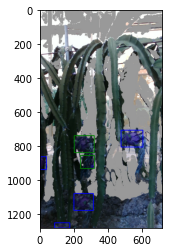

In [33]:
for num_IMG in range(1,10):
    rectangle_loc, image, image_name, image_Rb, image_name_Rb = Get_rectangle_loc(num_IMG = num_IMG)
    plot_rectanglebox(rectangle_loc, image = image, image_name= image_name, image_Rb=image_Rb, image_name_Rb=image_name_Rb)
    rectangle_loc, image, image_name = None, None, None 
    
    